In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sn
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import sys
import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTSC 710 - Final Project/(target)heart.csv") #AVI
#data = pd.read_csv("/content/drive/MyDrive/DTSC 710 - Final Project/(Target)Heart_Disease_Prediction.csv") # Binnu

In [ ]:
data.info()
#original dataset Heart Disease Presense, Absense has been changed to taret class in datset being used over here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<function matplotlib.pyplot.show(*args, **kw)>

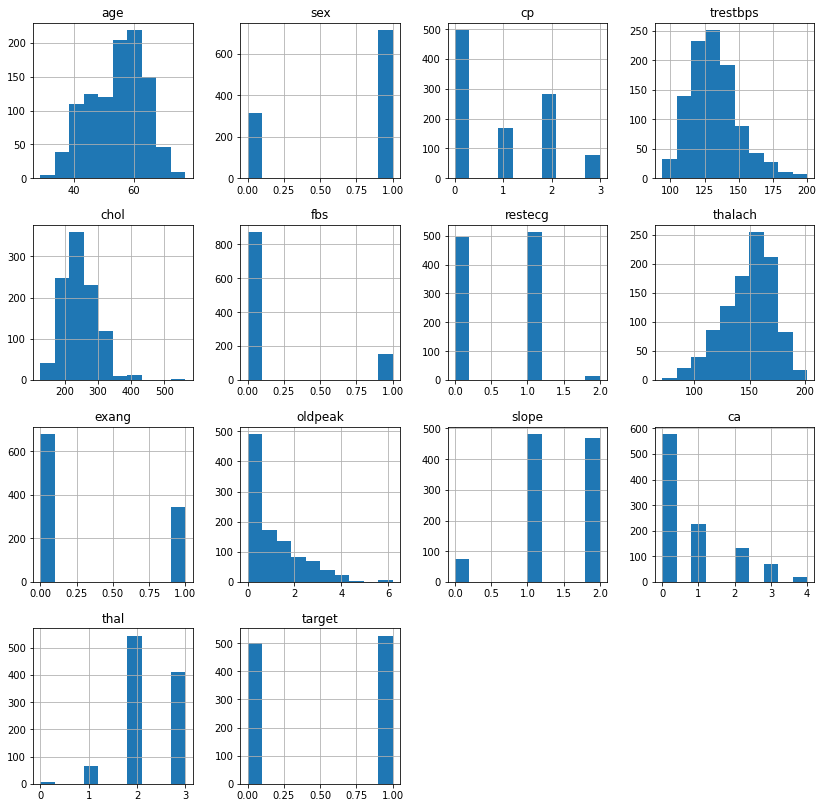

In [ ]:
data.hist(figsize =(14, 14))
plt.show

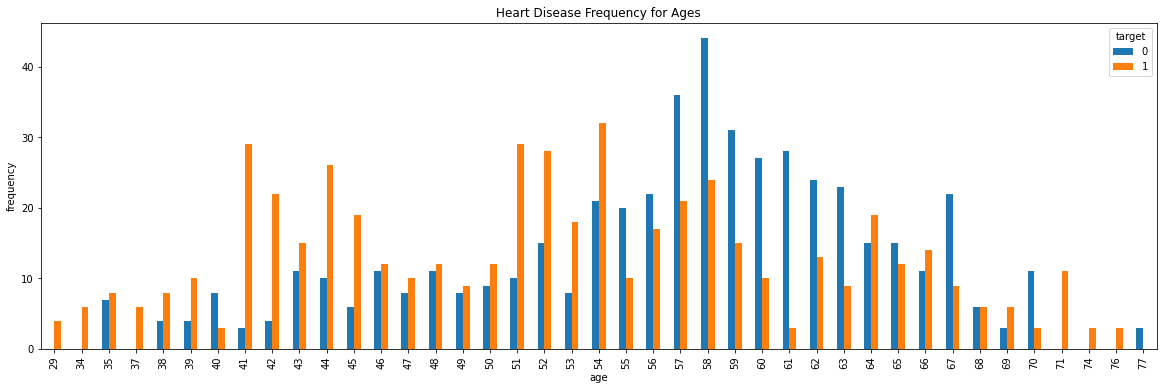

In [ ]:
pd.crosstab(data.age, data.target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

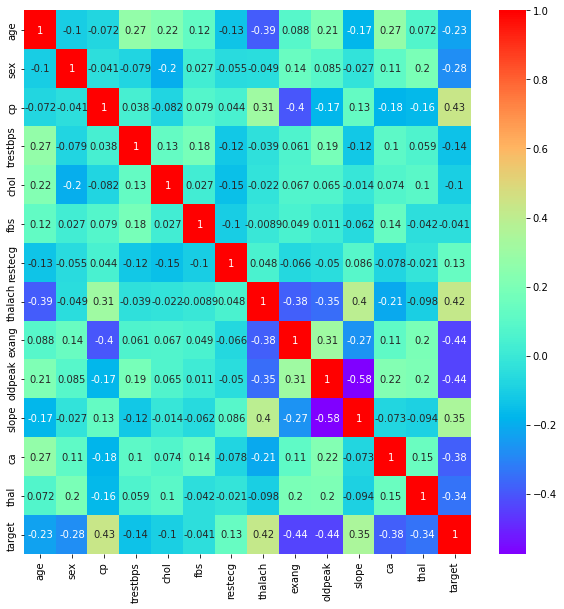

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr(),annot=True,cmap="rainbow")

In [ ]:
#Create Training and Testing Datasets
X = np.array(data.drop(['target'],1))
y = np.array(data['target'])

<ipython-input-13-0050f6b16a70>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['target'],1))


In [ ]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [ ]:
 # create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=50, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes=None) 
y_test = to_categorical(y_test, num_classes=None) 

print (y_train.shape) 
print (y_train[:10])

(820, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


Building and Training te Neuteral Network

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 6ms/step - loss: 0.7373 - accuracy: 0.4854 - val_loss: 0.7201 - val_accuracy: 0.4878
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.4988 - val_loss: 0.7137 - val_accuracy: 0.6634
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7241 - accuracy: 0.5146 - val_loss: 0.7166 - val_accuracy: 0.5707
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5293 - val_loss: 0.6959 - val_accuracy: 0.6293
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5561 - val_loss: 0.7029 - val_accuracy: 0.6439
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5915 - val_loss: 0.6764 - val_accuracy: 0.6098
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.5744 - val_loss: 0.6695 - val_accuracy: 0.6732
Epoch 8/50
82/82 [==

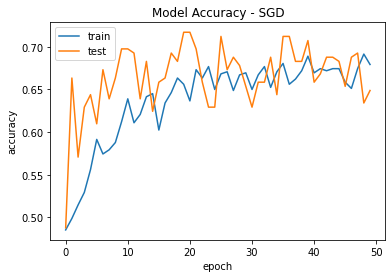

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

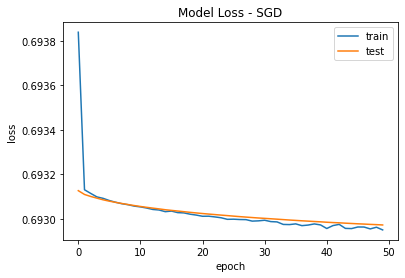

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1792      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 5ms/step - loss: 0.7272 - accuracy: 0.5037 - val_loss: 0.7101 - val_accuracy: 0.4878
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5341 - val_loss: 0.6901 - val_accuracy: 0.6976
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.5524 - val_loss: 0.6826 - val_accuracy: 0.6829
Epoch 4/50
82/82 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5927 - val_loss: 0.6394 - val_accuracy: 0.6829
Epoch 5/50
82/82 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6427 - val_loss: 0.5968 - val_accuracy: 0.7073
Epoch 6/50
82/82 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 0.6866 - val_loss: 0.5858 - val_accuracy: 0.6927
Epoch 7/50
82/82 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.7049 - val_loss: 0.5744 - val_accuracy: 0.7220
Epoch 8/50
82/82 [==

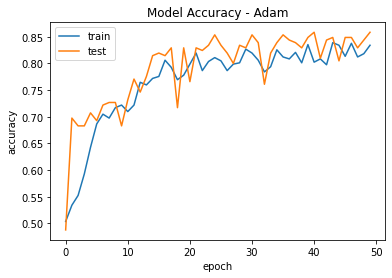

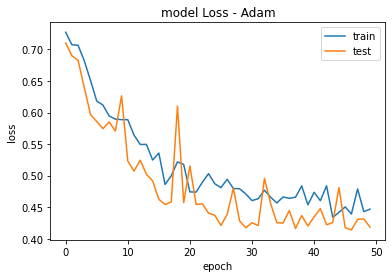

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss - Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 5ms/step - loss: 0.7341 - accuracy: 0.4805 - val_loss: 0.7108 - val_accuracy: 0.6439
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.5537 - val_loss: 0.7052 - val_accuracy: 0.6341
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.7277 - accuracy: 0.4976 - val_loss: 0.7022 - val_accuracy: 0.6390
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.7173 - accuracy: 0.5439 - val_loss: 0.7004 - val_accuracy: 0.6293
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5451 - val_loss: 0.6997 - val_accuracy: 0.6244
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5439 - val_loss: 0.6992 - val_accuracy: 0.6244
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.7172 - accuracy: 0.5329 - val_loss: 0.6979 - val_accuracy: 0.6341
Epoch 8/50
82/82 [==

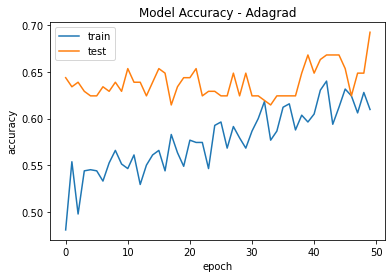

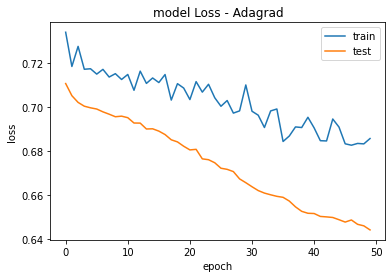

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Adagrad')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss - Adagrad')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='Ftrl', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1792      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.5122 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 8/50
82/82 [==

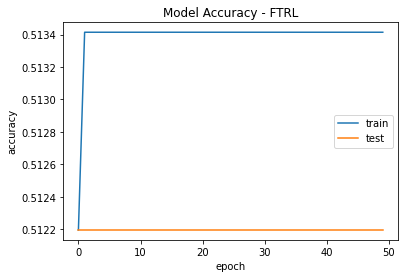

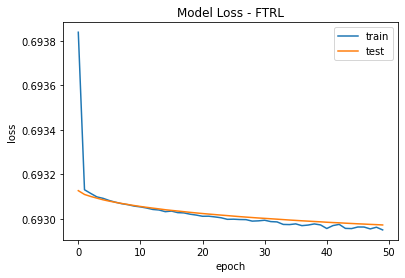

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - FTRL')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - FTRL')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()